# Global Validation of ECMWF ERA5 model runs CCI satilite SST

In [71]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import iris.coord_categorisation
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib

In [72]:
def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region


def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)

In [73]:
file = '/Users/ph290/Downloads/global/ERA5_global_surfacetemperature.nc'
# file_bottom = '/Users/ph290/Downloads/UK/era5_uk_bottomtemperature_ym.nc'

year_for_basic_comparison = 2018
min_year_for_comparison = 1996
# NOTE was min_year_for_comparison = 2006
max_year_for_comparison = 2016

lon_west = -180.0
lon_east = 180.0
lat_south = -65.0
lat_north = 65.0

In [74]:
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_19890101.nc','sea_surface_temperature')[0]
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_1989.nc','sea_surface_temperature')
# obs_cube_all = iris.load_cube('/Users/ph290/Downloads/global_tropics/ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.0-v02.0-fv01.0_regridded_yearmean.nc')
obs_cube_all = iris.load_cube('/Users/ph290/Downloads/global_tropics/ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.0-v02.0-fv01.0_regridded_seasmean.nc')
obs_cube_all -= 273.15
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_2008_all_tm.nc','sea_surface_temperature')

In [75]:
try:
    iris.coord_categorisation.add_year(obs_cube_all, 'time', name='year')
    iris.coord_categorisation.add_season_year(obs_cube_all, 'time', name='season_year')
    iris.coord_categorisation.add_season(obs_cube_all, 'time', name='season')
except:
    pass

print obs_cube_all.coord('year').points




    
obs_cube = obs_cube_all[np.where((obs_cube_all.coord('year').points >= min_year_for_comparison) & (obs_cube_all.coord('year').points <= max_year_for_comparison))]
obs_cube_yr = obs_cube.aggregated_by('year', iris.analysis.MEAN)
obs_cube_all = obs_cube_all.aggregated_by('season', iris.analysis.MEAN)

# obs_cube = obs_cube.collapsed(['time',iris.analysis.MEAN)
# obs_cube = obs_cube_all[np.where(obs_cube_all.coord('year').points == year_for_basic_comparison)]



[1982 1982 1982 1982 1983 1983 1983 1983 1984 1984 1984 1984 1985 1985 1985
 1985 1986 1986 1986 1986 1987 1987 1987 1987 1988 1988 1988 1988 1989 1989
 1989 1989 1990 1990 1990 1990 1991 1991 1991 1991 1992 1992 1992 1992 1993
 1993 1993 1993 1994 1994 1994 1994 1995 1995 1995 1995 1996 1996 1996 1996
 1997 1997 1997 1997 1998 1998 1998 1998 1999 1999 1999 1999 2000 2000 2000
 2000 2001 2001 2001 2001 2002 2002 2002 2002 2003 2003 2003 2003 2004 2004
 2004 2004 2005 2005 2005 2005 2006 2006 2006 2006 2007 2007 2007 2007 2008
 2008 2008 2008 2009 2009 2009 2009 2010 2010 2010 2010 2011 2011 2011 2011
 2012 2012 2012 2012 2013 2013 2013 2013 2014 2014 2014 2014 2015 2015 2015
 2015 2016 2016 2016 2016 2016]


In [76]:
# cube = iris.load_cube(file)[0]

cube_all = iris.load_cube(file)
try:
    iris.coord_categorisation.add_year(cube_all, 'time', name='year')
    iris.coord_categorisation.add_season(cube_all, 'time', name='season')
except:
    pass

# cube_all = cube_all.aggregated_by('year', iris.analysis.MEAN)

# cube_all.coord('longitude').points = cube_all.coord('longitude').points+180
# cube_all.data = np.ma.masked_array(cube_all.data)
# cube_all.data.fill_value = 9.96920997e+36
# iris.coord_categorisation.add_year(cube_all, 'time', name='year')
cube_all = cube_all[np.where((cube_all.coord('year').points >= min_year_for_comparison) & (cube_all.coord('year').points <= max_year_for_comparison))]
cube_yr = cube_all.aggregated_by('year', iris.analysis.MEAN)
cube_all = cube_all.aggregated_by('season', iris.analysis.MEAN)

cube_all.data = np.ma.masked_where(cube_all.data == 9.96920997e+36, cube_all.data)




In [77]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='red',
                                        facecolor=cfeature.COLORS['land'])

In [78]:


# cube_0 = cube.copy()
# cube_0_data = cube_0.data
# lat = cube_0.coord('latitude').points
# lon = cube_0.coord('longitude').points

# fig = plt.figure(figsize=(20, 20))
# ax1 = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
# p1 = ax1.pcolormesh(lon, lat,cube_0_data,
#                 transform=ccrs.PlateCarree(),vmin=0,vmax=35,
#                 cmap='plasma')
# # plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
# ax1.add_feature(land_50m, edgecolor='gray')
# cbar1 = plt.colorbar(p1,ax=ax1,orientation='horizontal')
# cbar1.set_label('$^{\circ}$C')


# #########

# obs_cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

# obs_cube_data = obs_cube_region.data
# lat2 = obs_cube_region.coord('latitude').points
# lon2 = obs_cube_region.coord('longitude').points

# ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
# p2 = ax2.pcolormesh(lon2, lat2,obs_cube_data,
#                 transform=ccrs.PlateCarree(),vmin=0,vmax=35,
#                 cmap='plasma')
# # plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
# ax2.add_feature(land_50m, edgecolor='gray')
# cbar2 = plt.colorbar(p2,ax=ax2,orientation='horizontal')
# cbar2.set_label('$^{\circ}$C')
# ####

# ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())

# p3 = ax3.pcolormesh(lon2, lat2,obs_cube_data,
#                 transform=ccrs.PlateCarree(),vmin=0,vmax=35,
#                 cmap='plasma')
# p3b = ax3.pcolormesh(lon, lat,cube_0_data,
#                 transform=ccrs.PlateCarree(),vmin=0,vmax=35,
#                 cmap='plasma')
# # plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
# ax3.add_feature(land_50m, edgecolor='gray')
# cbar3 = plt.colorbar(p3,ax=ax3,orientation='horizontal')
# cbar3.set_label('$^{\circ}$C')

# # plt.gca().coastlines('10m')

# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/figures/global_s2p3.png',dpi=600)
# plt.show()

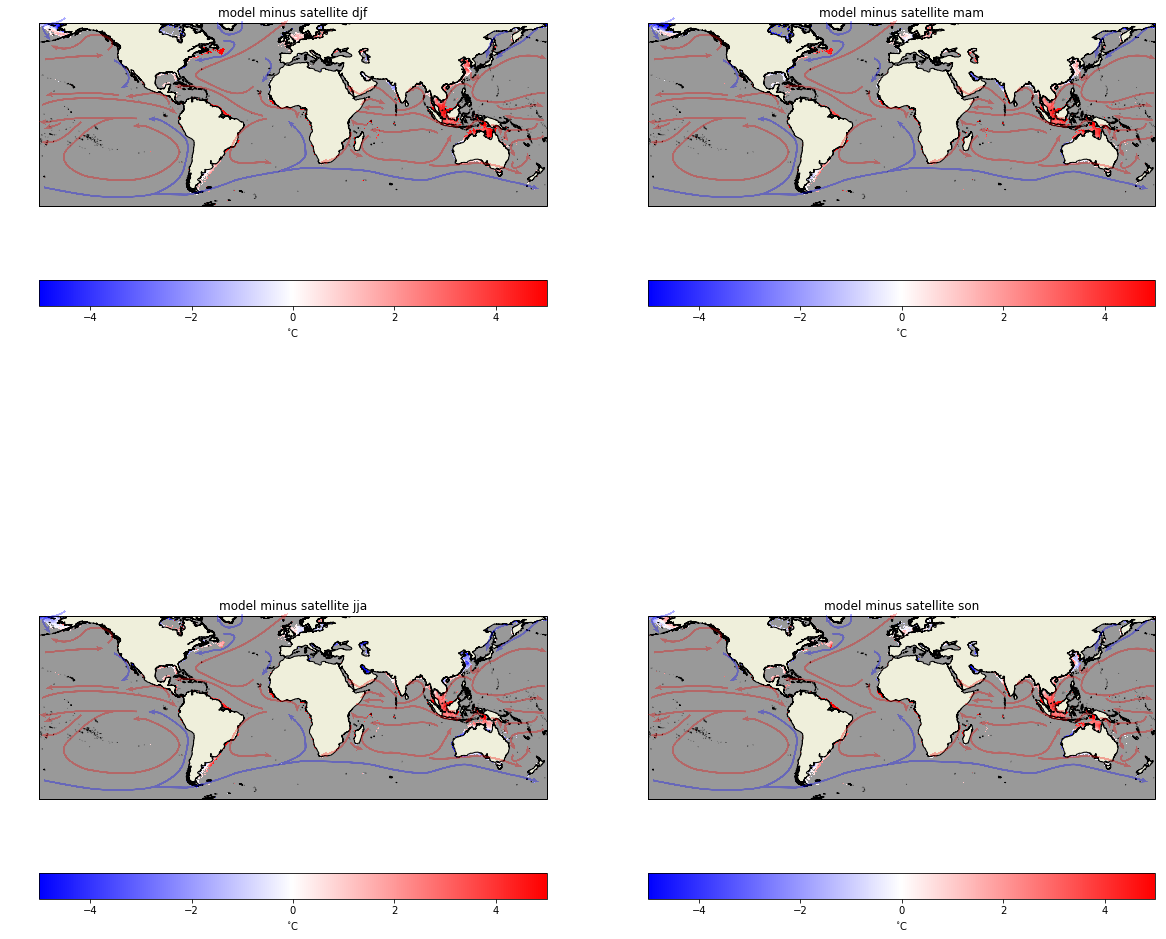

In [79]:
plt.close('all')

fig = plt.figure(figsize=(20, 20))

seasons = cube_all.coord('season').points

for i,season in enumerate(seasons):

# i=0
# season = seasons[0]

    ax3 = plt.subplot(2, 2, i+1, projection=ccrs.PlateCarree())
    # ax3 = plt.axes(projection=ccrs.PlateCarree())
    ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

    c_model = extract_region(cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)
    # c_model.coord('longitude').points = c_model.coord('longitude').points + 180

    c_obs_region = extract_region(obs_cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)

    c_model.coord('latitude').coord_system = c_obs_region.coord('latitude').coord_system
    c_model.coord('longitude').coord_system = c_obs_region.coord('longitude').coord_system

    c_obs_region_regridded = c_obs_region.regrid(c_model, iris.analysis.Linear())
    # obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

    model_data = c_model.data
    lat_model = c_model.coord('latitude').points
    lon_model = c_model.coord('longitude').points


    obs_data = c_obs_region_regridded.data
    lat_obs = c_obs_region_regridded.coord('latitude').points
    lon_obs = c_obs_region_regridded.coord('longitude').points



    # ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # ax3.contour(lon_bathy, lat_bathy,bathy_data,5,colors = 'k')
    # fig.patch.set_facecolor('grey')

    cmap = matplotlib.cm.bwr
    cmap.set_bad((0.6, 0.6, 0.6, 0.6),1.)

    ax3.add_feature(land_10m, edgecolor='k')

    p3 = ax3.pcolormesh(lon_obs, lat_model,model_data[0,:,:] - obs_data[0,:,:],
                    transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                    cmap=cmap)
    cbar = plt.colorbar(p3,orientation='horizontal')
    cbar.set_label('$^{\circ}$C')


    ax3.title.set_text('model minus satellite '+season)
    im = plt.imread('/Users/ph290/ocean_currents2.png')
    #     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], anchor='NE', zorder=1)
    #     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], zorder=1)
    newax = fig.add_subplot(2, 2, i+1, zorder=1)
#     plt.subplots_adjust(bottom = 0.0,top=0.1)
#     plt.subplots_adjust(bottom=0.0, left=0.1,right=0.9, top=0.8)
    newax.imshow(im)
    newax.axis('off')

# plt.tight_layout()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci.png')

plt.show()

# Do the same thing but single season

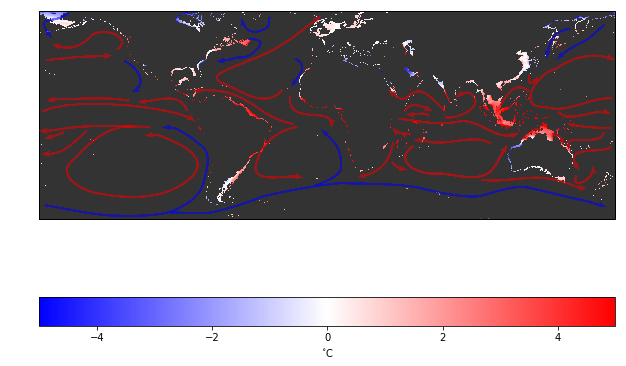

In [80]:
## plt.close('all')

fig = plt.figure(figsize=(10, 10))


ax3 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

cube_all_tmp = cube_all.collapsed('time',iris.analysis.MEAN)
c_model = extract_region(cube_all_tmp,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

obs_cube_all_tmp = obs_cube_all.collapsed('time',iris.analysis.MEAN)
c_obs_region = extract_region(obs_cube_all_tmp,lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_obs_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system = c_obs_region.coord('longitude').coord_system

c_obs_region_regridded = c_obs_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


obs_data = c_obs_region_regridded.data
lat_obs = c_obs_region_regridded.coord('latitude').points
lon_obs = c_obs_region_regridded.coord('longitude').points



# ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# ax3.contour(lon_bathy, lat_bathy,bathy_data,5,colors = 'k')
# fig.patch.set_facecolor('grey')

cmap = matplotlib.cm.bwr
cmap.set_bad((1.0, 1.0, 1.0, 1.0),1.)
cmap.set_bad((0.2, 0.2, 0.2, 0.2),1.)
# cmap.set_bad((0.0, 0.0, 0.0, 0.0),1.)

# cmap = matplotlib.cm.coolwarm

# ax3.add_feature(land_10m,edgecolor='none',facecolor=np.array([ 0.3 , 0.3 , 0.3]),)

p3 = ax3.pcolormesh(lon_obs, lat_model,model_data[:,:] - obs_data[:,:],transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
cmap=cmap)
cbar = plt.colorbar(p3,orientation='horizontal')
cbar.set_label('$^{\circ}$C')


# ax3.title.set_text('model minus satellite')
im = plt.imread('/Users/ph290/ocean_currents3.png')
#     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], anchor='NE', zorder=1)
#     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], zorder=1)
newax = fig.add_subplot(1, 1, 1, zorder=1)
# plt.subplots_adjust(bottom = 0.0,top=0.1)
plt.subplots_adjust(bottom=0.075, left=0.1,right=0.9, top=0.8)
newax.imshow(im)
newax.axis('off')

# plt.tight_layout()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_2.png',dpi=600)
# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_2.pdf')

plt.show()

In [81]:
cube_tmp_yr = cube_yr
c_model_yr = extract_region(cube_tmp_yr,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

obs_cube_tmp_yr = obs_cube_yr
c_obs_region_yr = extract_region(obs_cube_tmp_yr,lon_west,lon_east,lat_south,lat_north)

c_model_yr.coord('latitude').coord_system = c_obs_region_yr.coord('latitude').coord_system
c_model_yr.coord('longitude').coord_system = c_obs_region_yr.coord('longitude').coord_system

c_obs_region_regridded_yr = c_obs_region_yr.regrid(c_model_yr, iris.analysis.Linear())


In [82]:
# correlation
import iris.analysis.stats

time_coords=['season', 'season_year','year']

for time_coord in time_coords:
    try:
        c_obs_region_regridded_yr.remove_coord(time_coord)
    except:
        pass


for time_coord in time_coords:
    try:
        c_model_yr.remove_coord(time_coord)
    except:
        pass    

tmp_c_obs_region_regridded_yr = c_model_yr.copy()
tmp_c_obs_region_regridded_yr.data = c_obs_region_regridded_yr.data

corr_cube = iris.analysis.stats.pearsonr(tmp_c_obs_region_regridded_yr,c_model_yr,corr_coords=['time'])


ValueError: Require cube data with shape (17, 650, 1800), got (21, 650, 1800).

In [ ]:
## plt.close('all')

fig = plt.figure(figsize=(10, 10))


ax3 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())



model_data_yr = c_model_yr.data
lat_model = c_model_yr.coord('latitude').points
lon_model = c_model_yr.coord('longitude').points


obs_data_yr = c_obs_region_regridded_yr.data
lat_obs = c_obs_region_regridded_yr.coord('latitude').points
lon_obs = c_obs_region_regridded_yr.coord('longitude').points



# ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# ax3.contour(lon_bathy, lat_bathy,bathy_data,5,colors = 'k')
# fig.patch.set_facecolor('grey')

cmap = matplotlib.cm.bwr
# cmap.set_bad((1.0, 1.0, 1.0, 1.0),1.)
# cmap.set_bad((0.2, 0.2, 0.2, 0.2),1.)
cmap.set_bad((0.7, 0.7, 0.7, 0.7),1.)

# cmap = matplotlib.cm.coolwarm

# ax3.add_feature(land_10m,edgecolor='none',facecolor=np.array([ 0.3 , 0.3 , 0.3]),)

p3 = ax3.pcolormesh(lon_obs, lat_model,corr_cube.data[:,:]*corr_cube.data[:,:],transform=ccrs.PlateCarree(),vmin=-1,vmax=1,
cmap=cmap)
plt.gca().coastlines('50m',linewidth=0.5)
cbar = plt.colorbar(p3,orientation='horizontal')
cbar.set_label('R$^2$')


# plt.tight_layout()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_correlation.png',dpi=600)
# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_2.pdf')

plt.show()

# tidal data comparison

In [ ]:
tide_file = '/Users/ph290/Downloads/s12_m2_s2_n2_h_map_0point2_global_6565.dat'

In [ ]:
# tide_data = np.genfromtxt(tide_file,skip_header=1)
tide_data = np.genfromtxt(tide_file,skip_header=1,delimiter=(8, 8,6,6,6,6,6,6,6,6,6,6,8))

In [ ]:
tide_data

In [ ]:
nx,ny = len(np.unique(tide_data[:,0])),len(np.unique(tide_data[:,1]))

X = tide_data[:,0].reshape(nx,ny).T
Y = tide_data[:,1].reshape(nx,ny).T
Z = tide_data[:,2].reshape(nx,ny).T # Note solumn 2 is M2 tides tidal_components = ['m2', 's2', 'n2','k1','o1']

plt.pcolormesh(X,Y,Z,vmin=00.0,vmax=150.0)
# plt.pcolormesh(X,Y,Z,vmin=0.0,vmax=5000.0)
plt.colorbar()
plt.show()

In [ ]:

plt.pcolormesh(X,Y,cube_all_tmp.data)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.pcolormesh(X,Y,model_data- obs_data,vmin=5,vmax=12)


In [ ]:
plt.scatter(Z,np.abs(model_data-obs_data),s=0.1)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde

# x = np.reshape(Z,nx*ny)
# loc=np.isfinite(x)
# x=x[loc]
# y = np.reshape(np.abs(model_data-obs_data),nx*ny)[loc]
# loc=np.isfinite(y)
# x=x[loc]
# y=y[loc]

# # Calculate the point density
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)

# fig, ax = plt.subplots(figsize=(5, 5))
# ax.scatter(x, y, c=z, s=10, edgecolor='',cmap='viridis')
# plt.xlabel('M2 tide amplitude (cm)')
# plt.ylabel('absolute SST bias ($^{\circ}$C)')

# plt.xlim([0,300])
# plt.colobar()
# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/tides_v_t_bias.png',dpi=600)

# plt.show()

In [ ]:

x = np.reshape(Z,nx*ny)
loc=np.isfinite(x)
x=x[loc]
y = np.reshape(np.abs(model_data-obs_data),nx*ny)[loc]
loc=np.isfinite(y)
x=x[loc]
y=y[loc]

fig = plt.subplots(figsize=(5, 4))
ymax=6
xmax=100
loc = np.where(x <= xmax)
x = x[loc]
y = y[loc]
loc = np.where(y <= ymax)
x = x[loc]
y = y[loc]

plt.hist2d(x, y, (20, 20), cmap='Reds')
# plt.xlim(0,100)
# plt.ylim(0,6)
cbar = plt.colorbar()
cbar.set_label('number of grid cells per 2D bin')
# plt.show()

plt.xlabel('M2 tide amplitude (cm)')
plt.ylabel('absolute SST bias ($^{\circ}$C)')

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/tides_v_t_bias.png',dpi=600)
